In [3]:
cd ../python/

/Users/workspace/income-prediction/src/python


In [4]:
import utils

In [97]:
from sklearn.manifold import TSNE

In [34]:
target = utils.read_target('../../local_resources/income_dataset/y_thresh10.p')

In [35]:
target.head()

,fan_idx,mean_income
fan_id,,
10571,0,10325
11758,1,34684
9269,2,40848
33493,3,42761
75533,4,40848


In [55]:
emd_path = '../../local_results/thresh10_num_10_length_80_dimension_2.emd'

In [56]:
emd = pd.read_csv(emd_path, header=None, index_col=0, skiprows=1, sep=",")

In [98]:
model = TSNE(n_components=2, random_state=0)

In [99]:
embedding = model.fit_transform(emd)

In [100]:
embedding.shape

(4625, 2)

In [101]:
df = pd.DataFrame(data=embedding, index=None, columns=['x', 'y'])

In [102]:
df.head()

,x,y
0,-4.676580,4.636655
1,-4.565182,5.473167
2,-4.886350,4.574042
3,-3.954677,4.290175
4,-3.554307,4.191586


In [103]:
df.shape

(4625, 2)

In [106]:
df['label'] = np.array(target.loc[emd.index].mean_income)

In [107]:
df.head()

,x,y,label
0,-4.676580,4.636655,10325
1,-4.565182,5.473167,34684
2,-4.886350,4.574042,40848
3,-3.954677,4.290175,42761
4,-3.554307,4.191586,40848


In [57]:
emd.head()

,1,2
0,,
10571,-1.216603,0.285445
11758,-0.870988,0.708764
9269,-1.042711,0.453618
33493,-0.600143,1.055989
75533,-0.665514,0.985779


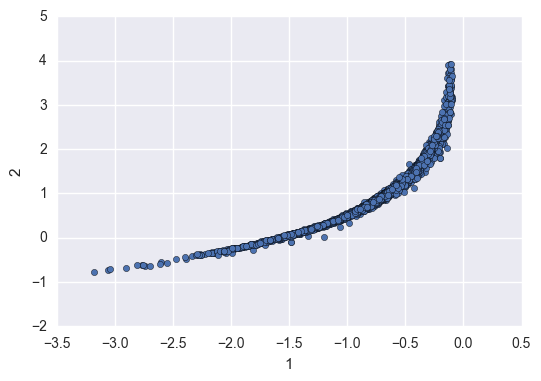

In [58]:
emd.plot.scatter(1,2)

In [60]:
all_data = emd.merge(target, left_index=True, right_index=True)

In [61]:
all_data.head()

,1,2,fan_idx,mean_income
10571,-1.216603,0.285445,0,10325
11758,-0.870988,0.708764,1,34684
9269,-1.042711,0.453618,2,40848
33493,-0.600143,1.055989,3,42761
75533,-0.665514,0.985779,4,40848


In [71]:
dfs = all_data.sample(frac=0.1)

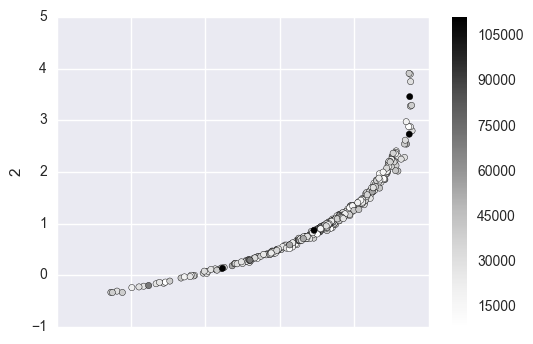

In [72]:
dfs.plot.scatter(1,2,color=dfs.mean_income, colorbar=True)

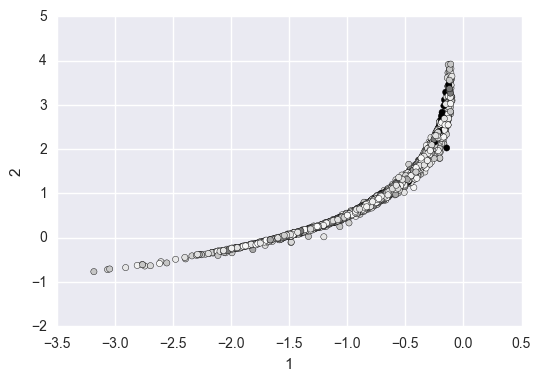

In [74]:
emd.plot.scatter(1,2, color=all_data.mean_income)

Need to investigate this embedding further. It's seems very interesting that the algorithm could find this structure. In the interest of time, now trying a TSNE 2D embedding

In [75]:
x_path = '../../local_resources/income_dataset/X_thresh10.p'
y_path = '../../local_resources/income_dataset/y_thresh10.p'
emd_path = '../../local_results/dimension_32_num_10_length_80_context_10.emd'

In [76]:
X, y = utils.read_data(x_path, y_path, threshold=10)

input matrix of shape: (4625, 53199)
output matrix of shape: (4625, 53199)
(4625, 53199)


In [80]:
target = utils.read_target(y_path)

In [81]:
target.head()

,fan_idx,mean_income
fan_id,,
10571,0,10325
11758,1,34684
9269,2,40848
33493,3,42761
75533,4,40848


In [82]:
y[0:20]

array([10325, 34684, 40848, 42761, 40848, 24749, 40848, 21801, 26134,
       32284, 38436, 22491, 28959, 26313, 70457, 40848, 32284, 40848,
       28959, 40848])

In [95]:
emd = pd.read_csv(emd_path, header=None, index_col=0, skiprows=1, sep=",")

In [96]:
emd.head()

,1,2,3,4,5,6,7,8,9,10,...,23,24,25,26,27,28,29,30,31,32
0,,,,,,,,,,,,,,,,,,,,,
10571,-0.271411,0.213040,0.119017,-0.663998,-0.660041,0.272358,0.217451,0.280781,0.154406,-0.545714,...,0.186014,-0.032899,-1.683122,0.381579,0.067497,-0.492434,-0.041024,-0.484226,-0.123622,-0.581950
11758,-0.253074,0.254557,0.864179,-0.448978,-0.107984,0.272475,-0.065715,0.425952,0.356216,0.179794,...,-0.321879,0.614259,-1.206438,-0.243221,-0.676679,-0.210828,0.384898,-0.686790,0.029010,-0.486680
9269,-0.079952,0.076985,0.025169,-0.052248,-0.605788,-0.118302,0.119596,0.647099,-0.173284,-0.664612,...,-0.054889,0.303328,-1.548491,-0.008547,-0.105979,-0.258532,0.512926,-0.348085,-0.198920,-0.354234
33493,-0.431454,0.159667,0.108922,0.399808,-0.088937,-0.203425,0.148994,0.268278,-0.432479,-0.488529,...,-0.136723,0.945122,-1.285575,-0.226934,-0.075017,-0.457938,0.192171,-0.355422,0.026222,0.209970
75533,-0.054204,-0.119410,0.320785,-0.126623,-0.235137,-0.402527,-0.102279,0.491862,-0.007809,-0.308770,...,-0.049251,0.622104,-1.249862,0.259479,0.085422,-0.236152,0.382696,-0.365388,-0.236112,0.287942


In [92]:
emd['label'] = target.loc[emd.index].mean_income

In [93]:
emd.head()

,1,2,3,4,5,6,7,8,9,10,...,24,25,26,27,28,29,30,31,32,label
0,,,,,,,,,,,,,,,,,,,,,
10571,-0.271411,0.213040,0.119017,-0.663998,-0.660041,0.272358,0.217451,0.280781,0.154406,-0.545714,...,-0.032899,-1.683122,0.381579,0.067497,-0.492434,-0.041024,-0.484226,-0.123622,-0.581950,10325
11758,-0.253074,0.254557,0.864179,-0.448978,-0.107984,0.272475,-0.065715,0.425952,0.356216,0.179794,...,0.614259,-1.206438,-0.243221,-0.676679,-0.210828,0.384898,-0.686790,0.029010,-0.486680,34684
9269,-0.079952,0.076985,0.025169,-0.052248,-0.605788,-0.118302,0.119596,0.647099,-0.173284,-0.664612,...,0.303328,-1.548491,-0.008547,-0.105979,-0.258532,0.512926,-0.348085,-0.198920,-0.354234,40848
33493,-0.431454,0.159667,0.108922,0.399808,-0.088937,-0.203425,0.148994,0.268278,-0.432479,-0.488529,...,0.945122,-1.285575,-0.226934,-0.075017,-0.457938,0.192171,-0.355422,0.026222,0.209970,42761
75533,-0.054204,-0.119410,0.320785,-0.126623,-0.235137,-0.402527,-0.102279,0.491862,-0.007809,-0.308770,...,0.622104,-1.249862,0.259479,0.085422,-0.236152,0.382696,-0.365388,-0.236112,0.287942,40848


In [94]:
emd.label.isnull().sum()

0

In [108]:
tsne = pd.read_csv('../../local_results/tsne.csv')

In [109]:
tsne.head()

,x,y,label
0,-4.676580,4.636655,10325
1,-4.565182,5.473167,34684
2,-4.886350,4.574042,40848
3,-3.954677,4.290175,42761
4,-3.554307,4.191586,40848


In [116]:
med = tsne.label.median()

In [117]:
med

28959.0

In [119]:
tsne['colour'] = (tsne.label > med).astype(int)

In [120]:
tsne.head()

,x,y,label,colour
0,-4.676580,4.636655,10325,0
1,-4.565182,5.473167,34684,1
2,-4.886350,4.574042,40848,1
3,-3.954677,4.290175,42761,1
4,-3.554307,4.191586,40848,1


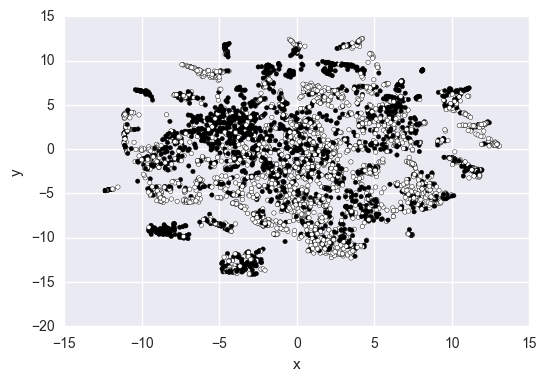

In [122]:
plot = tsne.plot.scatter('x','y',color=tsne.colour, s=10)

In [124]:
fig = plot.get_figure()

In [125]:
fig.savefig('../../local_results/figures/tsne.pdf')

In [ ]:
fix